<a href="https://colab.research.google.com/github/mdmelo/atlantis-example/blob/master/2-4-11-AssignmentQuestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [1]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [3]:
# Do not change this code
!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:05<00:00, 24.3MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 36.8MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 38.6MB/s]


In [4]:
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

In [7]:
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train'
VAL_DIRECTORY_LOCATION = '/tmp/validation'
TARGET_SIZE = (224,224)
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Now its your turn to define a model to learn this data.

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
# Find the features with Convolutions and Pooling
   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   # Flatten the results to feed into a DNN
   tf.keras.layers.Flatten(),
   # 512 neuron hidden layer
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

Then you'll need to pick an appropriate loss function and optimizer.

*A hint: remember we are classifying again.*

In [10]:
OPTIMIZER = 'adam'
LOSS_FUNCTION = 'categorical_crossentropy'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

Epoch 1/10
9/9 [==============================] - 25s 2s/step - loss: 1.2201 - accuracy: 0.3501 - val_loss: 1.0755 - val_accuracy: 0.4662
Epoch 2/10
9/9 [==============================] - 18s 2s/step - loss: 1.0563 - accuracy: 0.4787 - val_loss: 0.9540 - val_accuracy: 0.5865
Epoch 3/10
9/9 [==============================] - 17s 2s/step - loss: 0.9240 - accuracy: 0.5812 - val_loss: 0.8978 - val_accuracy: 0.5714
Epoch 4/10
9/9 [==============================] - 18s 2s/step - loss: 0.8820 - accuracy: 0.5745 - val_loss: 0.7975 - val_accuracy: 0.6541
Epoch 5/10
9/9 [==============================] - 17s 2s/step - loss: 0.8153 - accuracy: 0.6325 - val_loss: 0.7472 - val_accuracy: 0.6391
Epoch 6/10
9/9 [==============================] - 17s 2s/step - loss: 0.7785 - accuracy: 0.6460 - val_loss: 0.6852 - val_accuracy: 0.7068
Epoch 7/10
9/9 [==============================] - 18s 2s/step - loss: 0.8143 - accuracy: 0.6518 - val_loss: 0.7426 - val_accuracy: 0.6241
Epoch 8/10
9/9 [==================

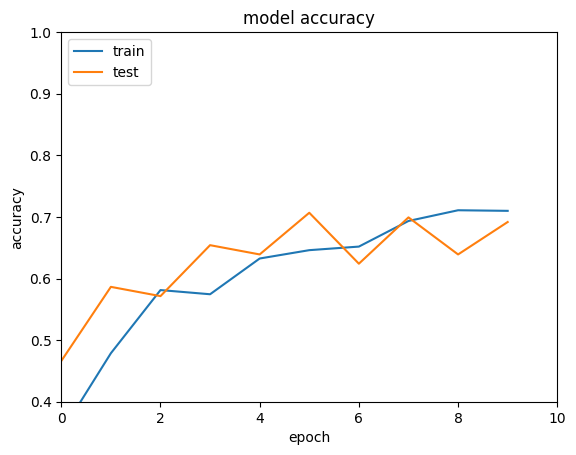

In [11]:
NUM_EPOCHS = 10 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()